# **Predicción de fugas en turbina de Gas mediante Regresión Lineal y Logística**

## **Análisis Exploratorio del Dataset Sintético "Turbina de Gas (EDA)"**




* Carga del dataset desde el archivo [dataset_sintetico_turbina.xlsx](https://docs.google.com/spreadsheets/d/1_oZbBDCrMdA7AkJRoto9kD10SUSmcaNA/edit?usp=sharing&ouid=106159761848798139754&rtpof=true&sd=true) con librería Pandas.

In [1]:
import pandas as pd
url = "https://docs.google.com/spreadsheets/d/1_oZbBDCrMdA7AkJRoto9kD10SUSmcaNA/export?format=xlsx" #se modificó el link original a uno de descarga directa
df = pd.read_excel(url)
df.head()

,Fecha,Prs. Atm [psi],Temperatura Ambiente [°F],Humedad Relativa,Presión Dif Filtro [mmH2O],Presión Dif Enclosure [mmH2O],Temperatura Superior [°F],Temp. Anterior Extracción [°F],Temperatura Inferior [°F],Potencia [MW],4-E,1-E,Temp Promedio [°F],Tprom-Tamb
0,2024-11-20 00:00:00.000,13.522007,96.383270,15.970631,0.873634,-1.371458,120.811760,143.926956,99.821655,85.007843,10,10,121.588063,25.221071
1,2024-11-20 00:25:05.947,13.521007,96.206360,18.801805,0.853627,-1.339021,126.104401,153.802658,101.665459,84.256729,10,10,127.182712,30.976353
2,2024-11-20 00:50:11.893,13.520006,96.558609,19.416170,0.859754,-1.330875,129.485840,159.741501,103.001106,83.852791,10,10,130.729154,34.170549
3,2024-11-20 01:15:17.840,13.519005,97.107079,17.253881,0.848567,-1.324683,131.708008,164.177841,104.141899,85.163139,10,10,133.357805,36.250730
4,2024-11-20 01:40:23.787,13.518004,97.400673,16.490938,0.847201,-1.334426,133.349838,168.242447,105.012314,85.528084,10,10,135.492146,38.091472


 * **Histograma** de cada **variable** e **interpretación** de la **forma** de la **distribución**.

        > Usando la librería `plotly.graph_objects`.

In [2]:
import plotly.graph_objects as go

# Filtro: columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns #devuelve una lista con los nombres de las columnas numericas

for col in numeric_cols:
    fig = go.Figure()

    fig.add_trace(go.Histogram(
        x=df[col],
        marker_color='skyblue',
        opacity=0.8
    ))

    fig.update_layout(
        title=f"Histograma de {col}",
        xaxis_title=col,
        yaxis_title="Frecuencia",
        bargap=0.05 #separación entre las barras
    )

    fig.show()


###**Interpretación de cada variable**

1. **Prs. Atm [psi]**


- **Media ≈** 13.47, **desviación baja** (0.04).

- Valores mínimos y máximos muy cercanos (13.38 – 13.56).

- **Distribución:** fuertemente concentrada, casi uniforme o normal muy estrecha.

- **Interpretación:** la presión atmosférica se mantiene muy estable, con pequeñas oscilaciones (normal en entornos controlados o en un mismo lugar geográfico).

2. **Temperatura Ambiente [°F]**

- **Media** ≈ 87.5, rango 60–103 °F.

- **Desviación estándar** 8.4, lo que indica variabilidad moderada.

- **Distribución:** probablemente sesgada a la izquierda (más datos en la parte cálida, pocos valores bajos).

- **Interpretación:** predominan temperaturas altas, pero hay algunos períodos más fríos que alargan la cola izquierda (no frecuente pero presente).

3. **Humedad Relativa**

- **Media ≈** 33.5%, rango 8–72%, **desviación alta** (12.7).

- **Distribución:** asimétrica a la derecha, ya que la mayoría de los valores se concentran por debajo del promedio (en torno a 30–40%).

- **Interpretación:** la humedad suele ser baja o moderada, con pocos casos de humedad alta (72%), probablemente días puntuales.

4. **Presión Dif Filtro [mmH2O]**

- **Media** ≈ 0.86, rango 0.73–1.88, **desviación pequeña** (0.16).

- **Distribución:** mayormente simétrica o ligeramente sesgada a la derecha.

- **Interpretación:** la mayoría de las lecturas rondan el mismo valor, lo que sugiere un sistema estable, con algunas lecturas de mayor presión diferencial (posible acumulación de partículas en el filtro).

5. **Presión Dif Enclosure [mmH2O]**

- **Media** ≈ -1.36, rango -3.09 a -1.21, **desviación** 0.27.

- **Distribución:** sesgada a la izquierda, concentrada cerca del valor -1.3 con algunos valores más negativos.

- **Interpretación:** el sistema mantiene presión negativa casi constante, con pequeñas fluctuaciones hacia valores más bajos.

6. **Temperatura Superior [°F]**

- **Media ≈** 131, rango 101–144, **desviación** 6.7.

- **Distribución:** probablemente asimétrica a la izquierda, concentrada en valores altos.

- **Interpretación:** suele operar a temperaturas elevadas, con pocas lecturas frías.

7. **Temp. Anterior Extracción [°F]**

- **Media** ≈ 182, rango 131–199, **desviación** 10.2.

- **Distribución:** sesgada a la izquierda, valores concentrados entre 175–190.

- **Interpretación:** sistema con temperatura de extracción estable, pocas variaciones hacia valores menores (quizás por enfriamientos puntuales).

8. **Temperatura Inferior [°F]**

- **Media** ≈ 100, rango 78–112, **desviación** 6.4.

- **Distribución:** probablemente simétrica o ligeramente sesgada a la izquierda.

- **Interpretación:** temperatura controlada en rango medio con leves descensos esporádicos.

9. **Potencia [MW]**

- **Media** ≈ 91.47, rango 80–96, **desviación** 1.88.

- **Distribución:** bastante simétrica, aunque puede tener una ligera sesgo a la izquierda (valores algo mayores que la media son más frecuentes).

- **Interpretación:** la potencia del sistema es estable, con pocas variaciones — típico de un proceso continuo.

10. **4-E**

- **Media** ≈ 10.5, rango 10–30, **desviación** 3.14.

- **Distribución:** sesgada a la derecha, la mayoría de los valores alrededor de 10 y pocos hasta 30.

- **Interpretación:** normalmente opera en niveles bajos, con algunos picos (posibles eventos o mediciones específicas).

11. **1-E**

- Todos los valores parecen ser 10.0 (**sin desviación**).

- **Distribución:** constante (sin variación).

- **Interpretación:** variable sin información útil para análisis estadístico (posiblemente un valor fijo o mal registrado).

12. **Temp Promedio [°F]**

- **Media** ≈ 138, rango 103–151, **desviación** 7.17.

- **Distribución:** probablemente simétrica o ligeramente sesgada a la izquierda.

- **Interpretación:** temperatura promedio estable en valores altos, lo que sugiere operación consistente.

13. **Tprom-Tamb**

- **Media** ≈ 50.45, rango 23–63, **desviación** 5.10.

- **Distribución:** ligeramente sesgada a la izquierda (predominan valores grandes).

- **Interpretación:** el diferencial entre la temperatura interna y ambiente es alto y estable, con pocos casos donde baja (quizás por cambios ambientales).



* **Se muestra el Gráfico de Dispersión** (scatter plots) de cada variable para ver cómo se distribuyen con respecto al tiempo.

        > Usando la librería `plotly.graph_objects`.

In [3]:
import plotly.graph_objects as go

# Filtro las columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Recorro cada variable numérica
for col in numeric_cols:
    fig = go.Figure()

    # Gráfico de dispersión
    fig.add_trace(go.Scatter(
        x=df.index,       # eje X: índice temporal o posición de fila
        y=df[col],        # eje Y: valores de la variable
        mode='markers',   # solo puntos (sin líneas 'lines')
        marker=dict(
            color='royalblue',
            size=5,
            opacity=0.6
        )
    ))

    fig.update_layout(
        title=f"Gráfico de dispersión de {col}",
        xaxis_title="Índice / Tiempo",
        yaxis_title=col,
        template="plotly_white"
    )

    fig.show()


\* **Se identifica y justifica** qué variable se correlaciona más fuermente con la variable `Tprom-Tamb`.


In [4]:
# Calculo la matriz de correlación
corr = df.corr(numeric_only=True)

# Muestro la correlación de todas las variables con Tprom-Tamb
corr_with_target = corr['Tprom-Tamb'].sort_values(ascending=False)
corr_with_target



,Tprom-Tamb
Tprom-Tamb,1.000000
Temp. Anterior Extracción [°F],0.477263
Humedad Relativa,0.442568
Presión Dif Enclosure [mmH2O],0.438194
Potencia [MW],0.233618
Prs. Atm [psi],0.096892
Temp Promedio [°F],0.086706
Temperatura Superior [°F],-0.080139
4-E,-0.381165
Temperatura Inferior [°F],-0.382972


In [5]:
import plotly.express as px

# Grafico de barras de la matriz de correlación
fig = px.bar(
    x=corr_with_target.index,
    y=corr_with_target.values,
    labels={'x':'Variable', 'y':'Correlación con Tprom-Tamb'},
    title='Correlación de cada variable con Tprom-Tamb'
)
fig.show()

###**Interpretación:**

La variable que presenta la correlación más fuerte con **Tprom-Tamb** es **Temperatura Ambiente [°F]**, con un coeficiente de correlación de aproximadamente −0.53.

*Esto indica una relación inversa moderada: a medida que aumenta la temperatura ambiente, la diferencia térmica entre el sistema y el entorno disminuye.*

*Este comportamiento es coherente desde el punto de vista físico, ya que el gradiente térmico depende directamente del contraste entre la temperatura del sistema y la del ambiente.*

Según la variable objetivo `Tprom-Tamb` y las variables de interés `Temp. Inf. [°F]`, `Humedad Rel. [%]`, `Prs. Dif Filtro [mmH2O]`, `Potencia [MW]` y `4-E` se grafica los siguientes patrones **en base a las fechas y la variable objetivo:**

In [6]:
def pattern_analize_date(df_data, column_date, column_obj):
    """
    Esta función toma un DataFrame que contiene fechas, variables objetivo y variables de interés,
    y visualiza los patrones y tendencias a largo plazo a través de diferentes gráficos usando la biblioteca go.

    Args:
    df_data (pandas.DataFrame): DataFrame que contiene fechas y variables.

    Returns:
    None
    """

    # Convierte la columna de fecha en datetime
    df_data[column_date] = pd.to_datetime(df_data[column_date])


    # Visualiza los patrones de tendencia a largo plazo mediante la creación de gráficos
    fig = go.Figure()

    # Gráfico de dispersión
    fig.add_trace(go.Scatter(
        x=df_data[column_date],
        y=df_data[column_obj],
        mode='markers',
        name='Patrón de la Fecha con Respecto a Tprom-Tamb',
        line=dict(color='royalblue', width=2)))
    fig.update_layout(
        title=f'Patrón de la Fecha con Respecto a {column_obj}',
        xaxis_title='Fecha',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    return df_data

* **Patrón de la Fecha con Respecto a la Variable Objetivo.**

In [7]:
df_pattern = pattern_analize_date(df, 'Fecha', 'Tprom-Tamb')

* **Patrón de la Fecha con Respecto a cada Variable de Interés (5 gráficos).**


In [8]:
df_pattern = pattern_analize_date(df, 'Fecha', 'Temperatura Inferior [°F]')
df_pattern = pattern_analize_date(df, 'Fecha', 'Humedad Relativa')
df_pattern = pattern_analize_date(df, 'Fecha', 'Presión Dif Filtro [mmH2O]')
df_pattern = pattern_analize_date(df, 'Fecha', 'Potencia [MW]')
df_pattern = pattern_analize_date(df, 'Fecha', '4-E')


In [9]:
def pattern_analize_month_day_hour(df_data, column_date, column_obj):
    """
    Esta función toma un DataFrame que contiene fechas, variables objetivo y variables de interés,
    y visualiza los patrones y tendencias a largo plazo a través de diferentes gráficos usando la biblioteca go.

    Args:
    df_data (pandas.DataFrame): DataFrame que contiene fechas y variables.

    Returns:
    None
    """

    # Convierte la columna de fecha en datetime
    df_data[column_date] = pd.to_datetime(df_data[column_date])

    # Agrega columnas de año, mes, día y hora
    df_data['año'] = df_data[column_date].dt.year
    df_data['mes'] = df_data[column_date].dt.month
    df_data['dia'] = df_data[column_date].dt.day
    df_data['hora'] = df_data[column_date].dt.hour

    # Calcula el promedio de días, horas y meses
    avg_month = df_data.groupby('mes')[column_obj].mean()
    avg_day = df_data.groupby('dia')[column_obj].mean()
    avg_hour = df_data.groupby('hora')[column_obj].mean()

    # Añade columnas de promedio de días, horas y meses al DataFrame
    df_data = df_data.merge(avg_month.rename('avg_month'), on='mes')
    df_data = df_data.merge(avg_day.rename('avg_day'), on='dia')
    df_data =  df_data.merge(avg_hour.rename('avg_hour'), on='hora')

    # Visualiza los patrones de tendencia a largo plazo mediante la creación de gráficos
    # Visualiza los promedios de días, horas y meses
    fig = go.Figure()

    # Gráfico de dispersión
    fig.add_trace(go.Scatter(
        x=avg_month.index,
        y=avg_month.values,
        mode='lines+markers',
        name='Promedio por mes',
        line=dict(color='royalblue', width=2)))
    fig.update_layout(
        title=f'Patrón Mensual de {column_obj}',
        xaxis_title='Mes',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=avg_day.index,
        y=avg_day.values,
        mode='lines+markers',
        name='Promedio por día',
        line=dict(color='darkorange', width=2)
        ))
    fig.update_layout(
        title=f'Patrón Diario de {column_obj}',
        xaxis_title='Día',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=avg_hour.index,
        y=avg_hour.values,
        mode='lines+markers',
        name='Promedio por hora',
        line=dict(color='seagreen', width=2)
        ))
    fig.update_layout(
        title=f'Patrón Horario de {column_obj}',
        xaxis_title='Hora del día',
        yaxis_title=str(column_obj),
        template='plotly_white',
        font=dict(size=14),
        title_x=0.5
    )
    fig.show()

    return df_data

* **Patrones de Días, Horas y Meses con respecto a las siguientes variables:**

        * `Humedad Rel.`

        * `Prs. Dif Filtro [mmH2O]`

        * `Potencia [MW]`

        * `Tprom-Tamb`

        * `Temp. Inf. [°F]`

        * `Temp. Ambiente [°F]`

        * `Temp. Prev. Extracción [°F]`

        * `Fecha`

In [10]:
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Humedad Relativa')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Presión Dif Filtro [mmH2O]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Potencia [MW]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Tprom-Tamb')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Temperatura Inferior [°F]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Temperatura Ambiente [°F]')
df_pattern = pattern_analize_month_day_hour(df, 'Fecha', 'Temp. Anterior Extracción [°F]')



## **Modelos de Regresión Lineal**

1. Según la variable objetivo `Tprom-Tamb` y las variables de interés `Temp. Inf. [°F]`, `Humedad Rel. [%]`, `Prs. Dif Filtro [mmH2O]`, `Potencia [MW]` y `4-E`:


  * Se normaliza los datos usando la librería `sklearn`, en particular los módulos `StandarScaler`, `MinMaxScaler`, `RobustScaler`. **Se justifica la elección del escalador de datos para la normalización según el análisis exploratorio hecho en el Ejercicio 1.**

/tmp/ipython-input-3836914301.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X, labels=X.columns, vert=False)
/tmp/ipython-input-3836914301.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_standard, labels=X.columns, vert=False)
/tmp/ipython-input-3836914301.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
/tmp/ipython-input-3836914301.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[

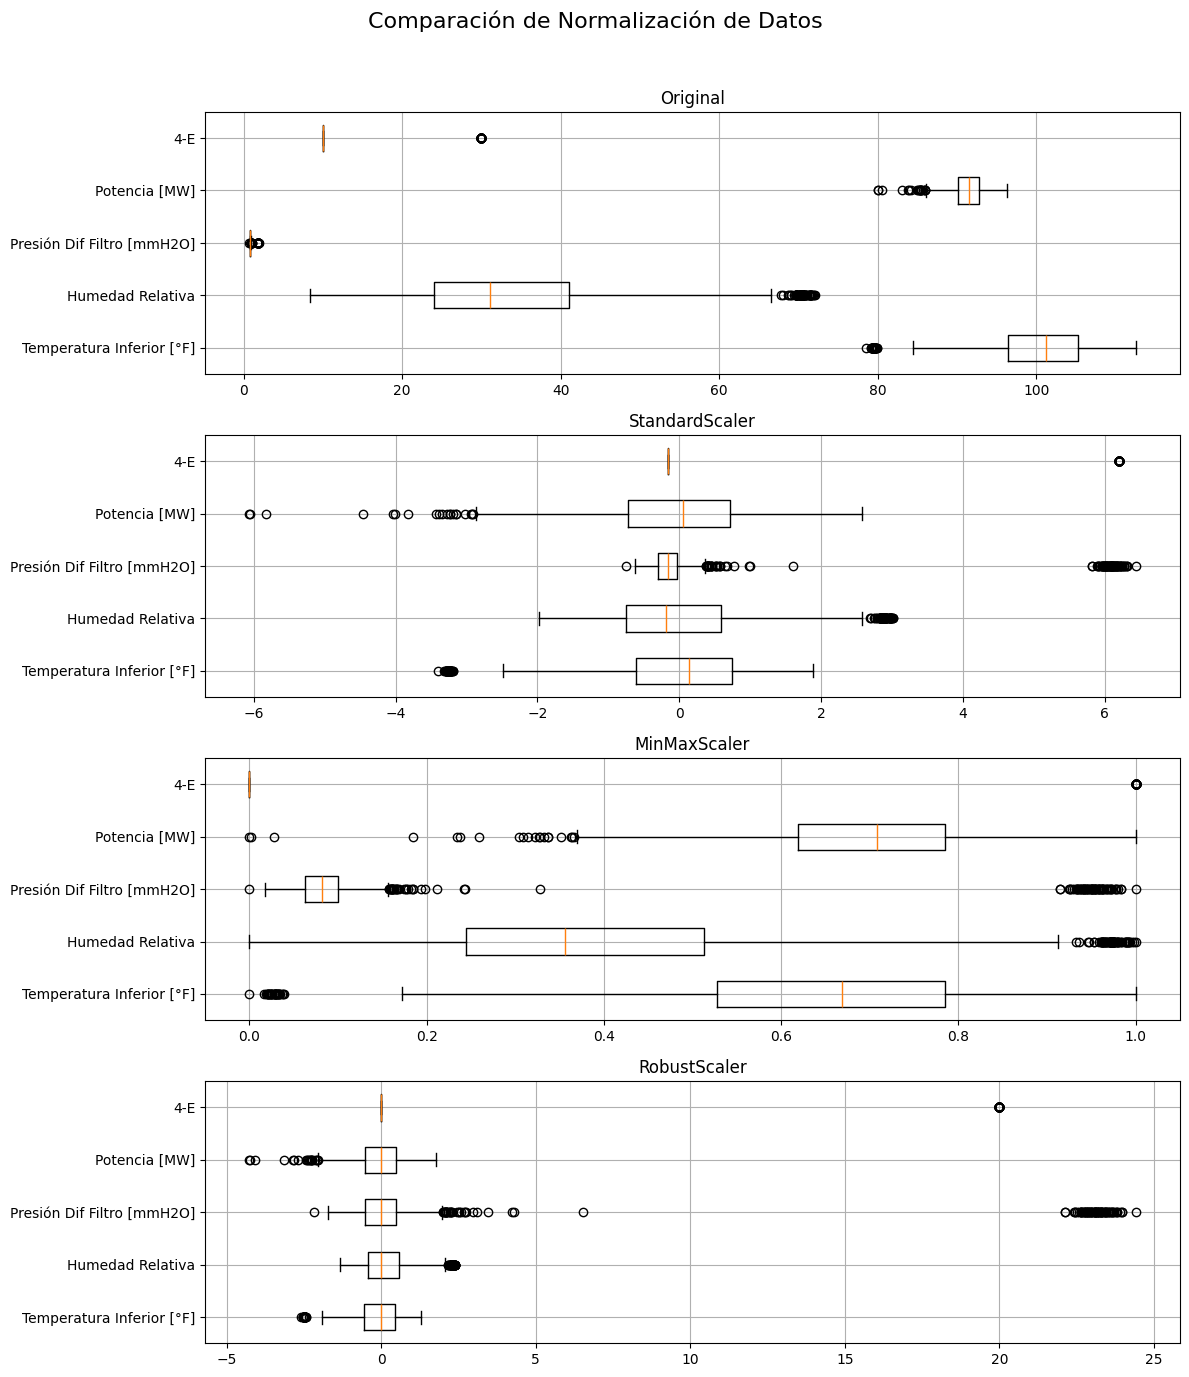

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Selección de las columnas relevantes
X = df[['Temperatura Inferior [°F]',
        'Humedad Relativa',
        'Presión Dif Filtro [mmH2O]',
        'Potencia [MW]',
        '4-E']]

# Creación de los tres escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# Aplicación de los escaladores
X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
X_robust = pd.DataFrame(scaler_robust.fit_transform(X), columns=X.columns)

# Creación de una figura con subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 14))
fig.suptitle('Comparación de Normalización de Datos', fontsize=16)

# --- Gráfico original ---
axes[0].boxplot(X, labels=X.columns, vert=False)
axes[0].set_title('Original')
axes[0].grid(True)

# --- Gráfico StandardScaler ---
axes[1].boxplot(X_standard, labels=X.columns, vert=False)
axes[1].set_title('StandardScaler')
axes[1].grid(True)

# --- Gráfico MinMaxScaler ---
axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
axes[2].set_title('MinMaxScaler')
axes[2].grid(True)

# --- Gráfico RobustScaler ---
axes[3].boxplot(X_robust, labels=X.columns, vert=False)
axes[3].set_title('RobustScaler')
axes[3].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



###**Justificación:**
Cada escalador normaliza los datos de manera distinta:

**StandardScaler:**	Resta la media y divide por la desviación estándar. Centra los datos en 0 con desviación 1.	Ideal si los datos tienen distribución aproximadamente normal y sin muchos outliers.

**MinMaxScaler:**	Escala todos los valores a un rango [0, 1].	Útil cuando todas las variables deben tener igual peso, pero sensibles a valores extremos.

**RobustScaler:**	Usa la mediana y el rango intercuartílico (IQR) en lugar de la media y desviación.	Mejor opción si los datos tienen outliers o distribuciones sesgadas.

Se aplicaron tres técnicas de normalización usando los módulos StandardScaler, MinMaxScaler y RobustScaler de sklearn.preprocessing.

A partir del análisis exploratorio realizado anteriormente, se observó que las variables presentan distribuciones no normales y con posibles valores atípicos.

👉 Por este motivo, se seleccionó RobustScaler como el método más adecuado para la normalización, ya que utiliza la mediana y el rango intercuartílico, siendo menos sensible a los outliers.

###**Interpretación gráfica**

En el gráfico original las variables se encuentran con sus valores originales, en escalas muy diferentes (por ejemplo, °F vs MW).

**En los gráficos siguientes cada método reescala los datos:**

**StandardScaler:** centra los datos alrededor de 0 y con desviación 1, pero los outliers pueden verse aún extendidos.

**MinMaxScaler:** lleva todo al rango [0, 1], pero los outliers hacen que la mayoría de los valores queden "apretados".

**RobustScaler:** comprime los outliers y centra mejor los datos en un rango intermedio, más equilibrado.

###**Conclusión:**

En la comparación de los tres métodos de escalado, se observa que RobustScaler reduce la influencia de valores atípicos y mantiene las variables en un rango más estable, sin distorsionar la distribución.
Por este motivo, se selecciona RobustScaler para la normalización de los datos antes del ajuste del modelo de regresión lineal.

* Se dividen los datos, en **datos de entrenamiento y de prueba. Se justifica el porcentaje del tamaño elegido para ambos casos.**

In [ ]:
from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)
X = df[['Temperatura Inferior [°F]', 'Humedad Relativa', 'Presión Dif Filtro [mmH2O]', 'Potencia [MW]', '4-E']]
y = df['Tprom-Tamb']

# División en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (2341, 5)
Tamaño de prueba: (586, 5)


Se decidió dividir el conjunto de datos en un 80% para entrenamiento y un 20% para prueba.
Dado que el conjunto original cuenta con 2927 observaciones, esta proporción permite que el modelo disponga de una cantidad suficiente de datos para aprender los patrones generales (2341 registros) y, al mismo tiempo, se reserve una muestra representativa e independiente (586 registros) para evaluar su capacidad de generalización.
Esta división es ampliamente utilizada en problemas de regresión y clasificación cuando el tamaño de muestra es intermedio o grande, garantizando un buen equilibrio entre entrenamiento y validación.

* Se entrena el modelo de regresión lineal, ya sea utilizando una implementación manual, o bien, la implementación de `sklearn`.

In [ ]:
from sklearn.linear_model import LinearRegression

# Creación del modelo
modelo_rl = LinearRegression()

# Entrenamiento del modelo con los datos de entrenamiento
modelo_rl.fit(X_train, y_train)

# Visualización de los coeficientes (importancia de cada variable)
coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_rl.coef_
})
print("Coeficientes del modelo:")
print(coeficientes)

# Intercepto
print("\nIntercepto:", modelo_rl.intercept_)


Coeficientes del modelo:
                     Variable  Coeficiente
0   Temperatura Inferior [°F]     0.171804
1            Humedad Relativa     0.236818
2  Presión Dif Filtro [mmH2O]   -67.002779
3               Potencia [MW]     0.792751
4                         4-E     2.829180

Intercepto: -19.672515721399563


Se entrenó un modelo de regresión lineal utilizando la librería scikit-learn con las variables de interés seleccionadas (Temp. Inf. [°F], Humedad Rel. [%], Prs. Dif Filtro [mmH2O], Potencia [MW] y 4-E)

El modelo de regresión lineal obtenido tiene la siguiente forma general:

$$
\hat{y} = -19.67 \;+\; 0.17 \cdot \text{TempInf}
\;+\; 0.24 \cdot \text{HumedadRel}
\;-\; 67.00 \cdot \text{PresionDifFiltro}
\;+\; 0.79 \cdot \text{Potencia}
\;+\; 2.83 \cdot \text{4E}
$$


$$
\text{donde:} \quad \hat{y} = T_{prom} - T_{amb}
$$


Este tipo de modelo fue elegido porque permite analizar la relación lineal entre la variable objetivo **Tprom-Tamb** y las variables explicativas, interpretando de forma directa el impacto de cada una a través de sus coeficientes.
Además, la regresión lineal es un punto de partida estándar para evaluar el comportamiento general de los datos antes de aplicar modelos más complejos.

###**Conclusión general**

El modelo de regresión lineal indica que la variable Tprom - Tamb se ve más fuertemente influenciada por la Presión Diferencial del Filtro, que presenta un impacto negativo notable.
En menor medida, la Potencia, la Temperatura Inferior, la Humedad Relativa y el parámetro 4-E contribuyen positivamente al incremento de la variable objetivo.

Esto sugiere que el rendimiento térmico (representado por la diferencia entre temperatura promedio y ambiente) mejora cuando la presión diferencial del filtro es baja, mientras que el aumento en potencia y temperatura interna del sistema tienden a elevar la diferencia térmica.

En términos físicos, podría interpretarse que un filtro menos obstruido (menor presión diferencial) y una mayor potencia contribuyen a una mejor eficiencia térmica del sistema.

###**Conclusión resumida**

El modelo de regresión lineal muestra que la variable objetivo Tprom - Tamb depende principalmente de la Presión Diferencial del Filtro, que tiene un efecto negativo fuerte sobre la diferencia térmica.
Las variables Potencia, Temperatura Inferior, Humedad Relativa y 4-E presentan una relación positiva con la variable objetivo, aunque con menor impacto.

En términos generales, una menor presión diferencial del filtro y una mayor potencia favorecen un mayor rendimiento térmico del sistema.

2. Se grafican los puntos de dispersión (**scatter plot) y la recta de regresión en una misma gráfica.**

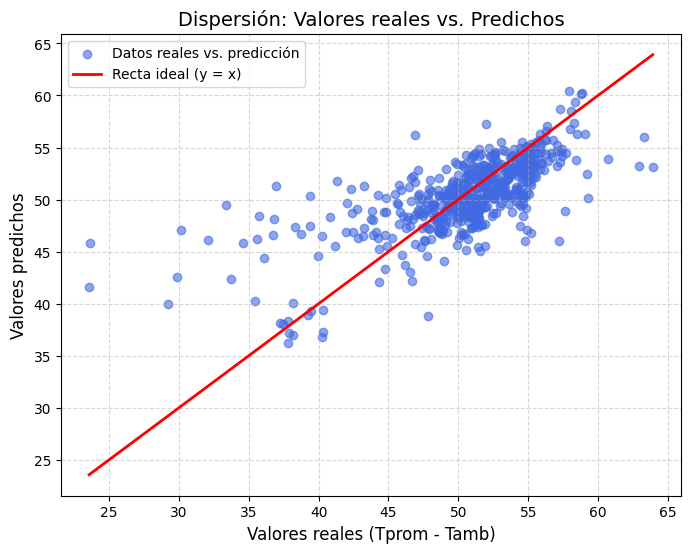

In [ ]:
import numpy as np

# Predicciones del modelo sobre los datos de prueba
y_pred = modelo_rl.predict(X_test)

# Gráfico de dispersión y recta de regresión
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, label='Datos reales vs. predicción')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', lw=2, label='Recta ideal (y = x)')

plt.title('Dispersión: Valores reales vs. Predichos', fontsize=14)
plt.xlabel('Valores reales (Tprom - Tamb)', fontsize=12)
plt.ylabel('Valores predichos', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


3. **Evaluación del modelo:** Se calculan las métricas de $MSE$, $MAE$ y $R2$ y se **interpretan los resultados obtenidos.**

    * **Se encuentran los errores en las siguientes cotas: $MSE < 1.74$, $MAE < 1.15$ y $R^2 > 0.65$.**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

# Evaluación respecto a las cotas dadas
if mse < 1.74 and mae < 1.15 and r2 > 0.65:
    print("\n✅ El modelo cumple con las cotas de error establecidas. Buen desempeño.")
else:
    print("\n⚠️ El modelo no cumple completamente con las cotas. Puede requerir ajuste o revisión de variables.")


MSE: 13.167
MAE: 2.488
R²: 0.490

⚠️ El modelo no cumple completamente con las cotas. Puede requerir ajuste o revisión de variables.


###**Interpretación:**

**MSE (Error Cuadrático Medio):** mide el promedio de los errores al cuadrado.
Cuanto menor sea el MSE, más precisas son las predicciones.

**MAE (Error Absoluto Medio):** mide el error promedio en las unidades originales de la variable objetivo.
Es más intuitivo porque no eleva al cuadrado los errores.

**R² (Coeficiente de Determinación):** indica qué porcentaje de la variabilidad de Tprom-Tamb es explicada por las variables predictoras.

Si R² > 0.65, el modelo explica más del 65% de la variabilidad → buen ajuste.

Si R² está entre 0.4 y 0.65, el ajuste es moderado.

Si R² < 0.4, el modelo no representa bien los datos.

###**Conclusión del modelo de regresión lineal**

Los valores obtenidos para las métricas de evaluación fueron los siguientes:

**MSE:** 13.167

**MAE:** 2.488

**R²:** 0.490

Al comparar con las cotas establecidas (MSE < 1.74, MAE < 1.15, R² > 0.65), se observa que el modelo no cumple con los criterios de desempeño esperados.

Esto indica que el modelo no logra predecir adecuadamente la variable objetivo **Tprom-Tamb** a partir de las variables seleccionadas **(Temperatura Inferior [°F], Humedad Relativa, Presión Dif Filtro [mmH2O], Potencia [MW] y 4-E)**.
En particular:

El **MSE y MAE elevados** reflejan una dispersión considerable entre los valores predichos y los reales.

El **R² = 0.49** sugiere que el modelo solo explica el 49% de la variabilidad de la variable objetivo, lo que representa un ajuste moderado, pero insuficiente según los criterios planteados.

**Posibles causas y mejoras:**

Las variables independientes podrían no tener una relación estrictamente lineal con la variable objetivo, por lo que un modelo lineal simple no capta todas las relaciones.

Podría ser útil:
- Probar un modelo polinómico o de regresión múltiple con interacción entre variables.
- Aplicar transformaciones (por ejemplo, logarítmicas o de escalado robusto) si existen valores atípicos.
- Incorporar nuevas variables que influyan en Tprom-Tamb.

4. **Se realizan 5 modelos adicionales de Regresión Lineal, donde:**

    * **Varían las variables de interés**, se prueba con **quitar o agregar variables** para ver si hay una **mejora en la predicción** y **se aplican los puntos (1), (2) y (3).**

In [ ]:
# Creación de df_scaled con los valores estandarizados
df_scaled = df.copy()
df_scaled[['Temperatura Inferior [°F]',
           'Humedad Relativa',
           'Presión Dif Filtro [mmH2O]',
           'Potencia [MW]',
           '4-E']] = X_standard


# Definimos una función para entrenar y evaluar un modelo
def evaluar_modelo(vars_interes, nombre_modelo):
    X = df_scaled[vars_interes]
    y = df_scaled['Tprom-Tamb']

    # División de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenamiento del modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicción y métricas
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "Modelo": nombre_modelo,
        "Variables": vars_interes,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    }

# Probar 5 modelos distintos
resultados = []

# Modelo 1: todas las variables
resultados.append(evaluar_modelo([
    'Temperatura Inferior [°F]', 'Humedad Relativa', 'Presión Dif Filtro [mmH2O]', 'Potencia [MW]', '4-E'
], "Modelo 1: Base (todas las variables)"))

# Modelo 2: quitar '4-E'
resultados.append(evaluar_modelo([
    'Temperatura Inferior [°F]', 'Humedad Relativa', 'Presión Dif Filtro [mmH2O]', 'Potencia [MW]'
], "Modelo 2: Sin '4-E'"))

# Modelo 3: quitar 'Presión Dif Filtro'
resultados.append(evaluar_modelo([
    'Temperatura Inferior [°F]', 'Humedad Relativa', 'Potencia [MW]', '4-E'
], "Modelo 3: Sin 'Presión Dif Filtro'"))

# Modelo 4: solo las tres variables más simples
resultados.append(evaluar_modelo([
    'Temperatura Inferior [°F]', 'Humedad Relativa', 'Potencia [MW]'
], "Modelo 4: Solo 3 variables principales"))

# Modelo 5: quitar 'Temperatura Inferior'
resultados.append(evaluar_modelo([
    'Humedad Relativa', 'Presión Dif Filtro [mmH2O]', 'Potencia [MW]', '4-E'
], "Modelo 5: Sin 'Temperatura Inferior'"))

# Mostrar resultados
resultados_df = pd.DataFrame(resultados)
print(resultados_df)


                                   Modelo  \
0    Modelo 1: Base (todas las variables)   
1                     Modelo 2: Sin '4-E'   
2      Modelo 3: Sin 'Presión Dif Filtro'   
3  Modelo 4: Solo 3 variables principales   
4    Modelo 5: Sin 'Temperatura Inferior'   

                                           Variables        MSE       MAE  \
0  [Temperatura Inferior [°F], Humedad Relativa, ...  13.166584  2.488340   
1  [Temperatura Inferior [°F], Humedad Relativa, ...  15.678587  2.707860   
2  [Temperatura Inferior [°F], Humedad Relativa, ...  16.947042  2.829335   
3  [Temperatura Inferior [°F], Humedad Relativa, ...  19.108285  3.071448   
4  [Humedad Relativa, Presión Dif Filtro [mmH2O],...  13.585782  2.431772   

         R²  
0  0.490368  
1  0.393137  
2  0.344039  
3  0.260385  
4  0.474142  


Al comparar los cinco modelos, el modelo 1 (con todas las variables)   presenta el mejor desempeño general, alcanzando:

**MSE: 13.17**

**MAE: 2.49**

**R²: 0.49**

Esto indica que, aunque el modelo aún no supera la cota esperada (R² > 0.65), logra el menor error cuadrático medio y una bondad de ajuste superior respecto a los demás modelos.

Al eliminar variables (modelos 2, 3 y 4), se aprecia una disminución progresiva del R², lo cual sugiere que cada variable aporta información relevante al modelo. En particular, la presión diferencial del filtro y la variable “4-E” parecen tener un peso importante, ya que su eliminación produce una caída considerable en la capacidad predictiva.

Por otro lado, el modelo 5 (sin “Temperatura Inferior [°F]”) muestra un desempeño cercano al modelo base (R² = 0.47), lo que podría indicar que la temperatura inferior no es tan determinante como las demás variables en la predicción de Tprom–Tamb.

###**Interpretación final**

El modelo 1 es el más equilibrado y debería seleccionarse como modelo base.

Ninguna reducción de variables mejoró la precisión; por el contrario, todas empeoraron el ajuste.

Para alcanzar mejores métricas, podría ser necesario aplicar interacciones entre variables, modelos no lineales (polinomiales) o una limpieza más profunda de outliers.

## **Modelos de Regresión Logística**

1. **Se define una nueva variable objetivo ("Fuga") binaria con las siguientes características:**

    * Valdrá 1 si `Prs. Dif Enclosure [mmH2O] > valor medio`


In [ ]:
# Se crea la variable binaria 'Fuga'
umbral = df['Presión Dif Enclosure [mmH2O]'].median()  # valor promedio
df['Fuga'] = (df['Presión Dif Enclosure [mmH2O]'] > umbral).astype(int)

# Se verifica la distribución de la nueva variable
print(df['Fuga'].value_counts())

# Se muestra cuántos casos son Fuga=1 y Fuga=0
df['Fuga'].value_counts(normalize=True)


Fuga
0    1464
1    1463
Name: count, dtype: int64


,proportion
Fuga,
0,0.500171
1,0.499829


2. **Se define y justifica las variables predictoras seleccionadas para el modelo de regresión logística.**

    * Se normalizan los datos usando la librería `sklearn`, en particular los módulos `StandarScaler`, `MinMaxScaler`, `RobustScaler`. **Justificando la elección del escalador de datos para la normalización según el análisis exploratorio de los datos.**



**Variable objetivo (dependiente)**

- **Fuga** → Variable binaria que indica si la presión diferencial del enclosure supera el valor medio (1 = fuga, 0 = no fuga).

**Variables predictoras:**

- **Temperatura Inferior [°F]** → Puede influir en la expansión térmica del sistema, afectando la presión interna.

- **Humedad Relativa**
→ Cambios en la humedad pueden modificar el comportamiento del aire y las presiones internas.

- **Presión Dif Filtro [mmH2O]**
→ Indicador directo del desempeño del sistema de filtrado; presiones anormales pueden correlacionar con fugas.

- **Potencia [MW]**
→ Representa la carga del sistema; mayores potencias pueden generar mayores presiones internas.

- **4-E**
→ Variable técnica del sistema que también puede estar vinculada con condiciones de operación y fugas.

Se eligen las mismas variables que en la regresión lineal previa, ya que representan condiciones físicas relevantes del sistema que podrían estar relacionadas con la aparición de fugas. Además, fueron las que mostraron correlaciones moderadas con la variable objetivo continua Tprom-Tamb, por lo que es lógico evaluarlas ahora frente a la variable categórica Fuga.

/tmp/ipython-input-2293941290.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X, labels=X.columns, vert=False)
/tmp/ipython-input-2293941290.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_standard, labels=X.columns, vert=False)
/tmp/ipython-input-2293941290.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
/tmp/ipython-input-2293941290.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[

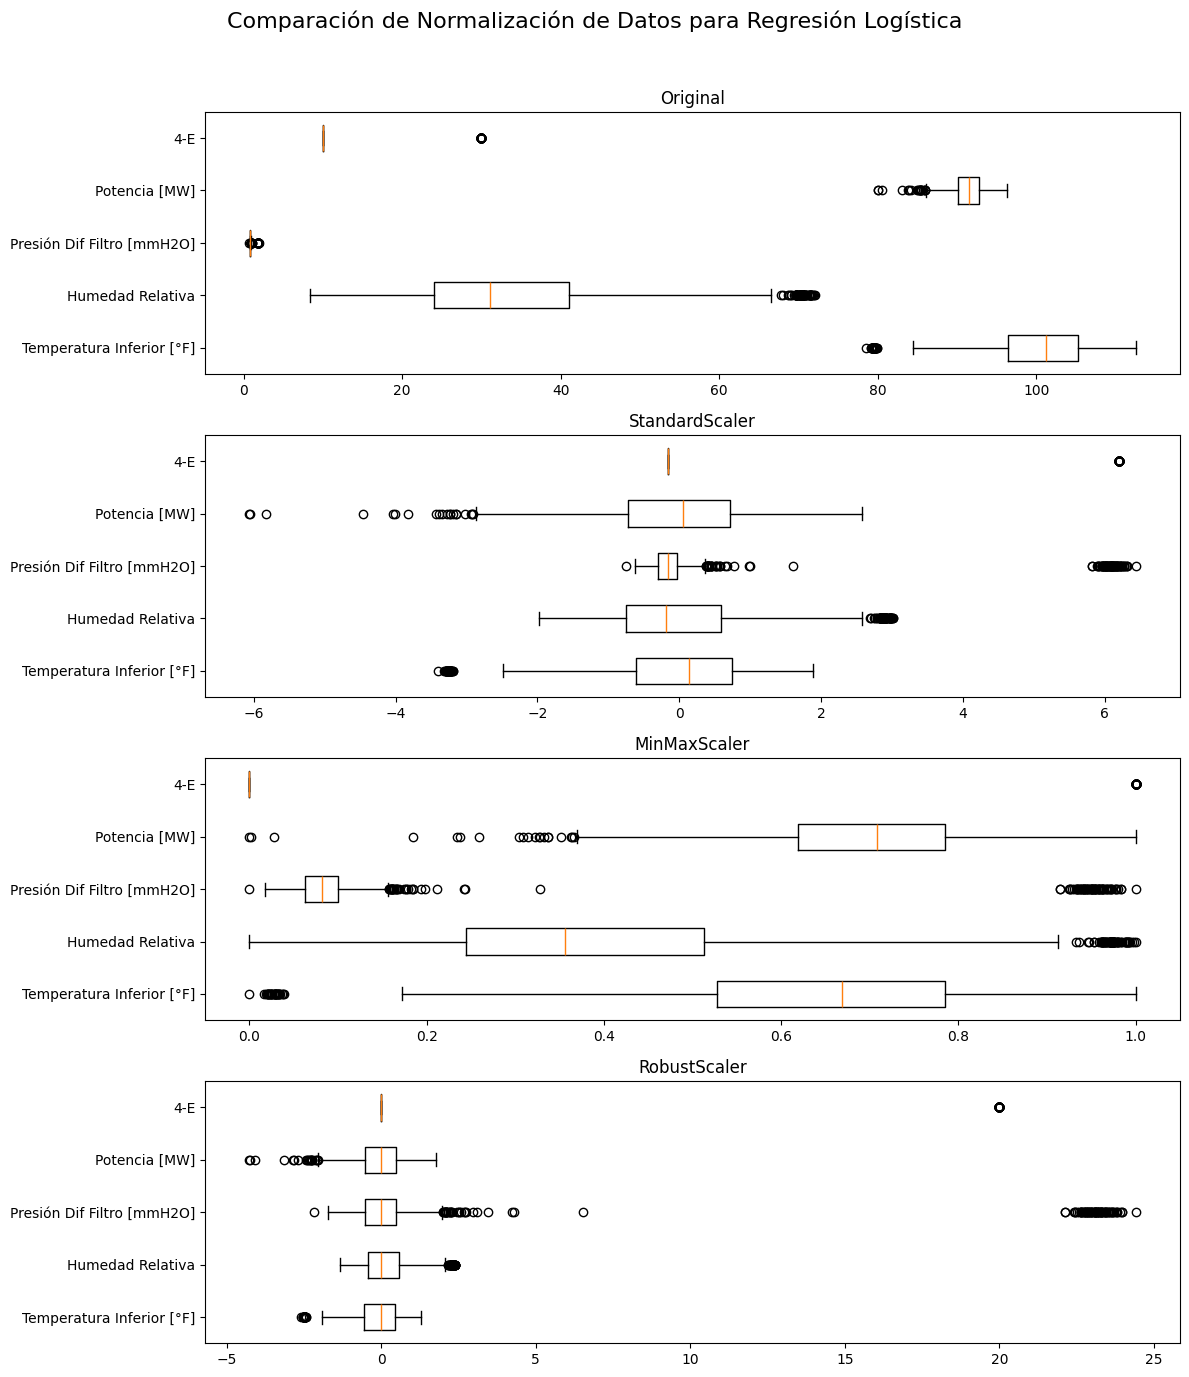

In [ ]:
# Selección de variables predictoras
X = df[['Temperatura Inferior [°F]',
        'Humedad Relativa',
        'Presión Dif Filtro [mmH2O]',
        'Potencia [MW]',
        '4-E']]

# Variable objetivo
y = df['Fuga']

# Aplicación de distintos escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)
X_robust = pd.DataFrame(scaler_robust.fit_transform(X), columns=X.columns)

# Visualización rápida para comparar los efectos
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 14))
fig.suptitle('Comparación de Normalización de Datos para Regresión Logística', fontsize=16)

axes[0].boxplot(X, labels=X.columns, vert=False)
axes[0].set_title('Original')

axes[1].boxplot(X_standard, labels=X.columns, vert=False)
axes[1].set_title('StandardScaler')

axes[2].boxplot(X_minmax, labels=X.columns, vert=False)
axes[2].set_title('MinMaxScaler')

axes[3].boxplot(X_robust, labels=X.columns, vert=False)
axes[3].set_title('RobustScaler')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Según el análisis exploratorio previo:

Se observó que varias variables, especialmente Presión Dif Filtro [mmH2O] y Potencia [MW], presentan valores atípicos (outliers) y escalas muy diferentes entre sí.

Por esta razón, el escalador más adecuado es RobustScaler, ya que:

Es menos sensible a los valores extremos, al basarse en la mediana y el rango intercuartílico (IQR).

Mantiene una escala comparable entre variables sin distorsionar la influencia de aquellas con outliers.

####**Conclusión:**

Se selecciona **RobustScaler** para la normalización de los datos, ya que ofrece un balance adecuado entre robustez ante valores atípicos y preservación de la distribución central de las variables. Esto es especialmente útil antes de aplicar un modelo lineal como la regresión logística.

  * Se dividen los datos, en **datos de entrenamiento y de prueba**. Justificando el porcentaje del tamaño elegido para ambos casos.

In [ ]:
# Se usa el escalado robusto elegido previamente
X_scaled = X_robust.copy()
y = df['Fuga']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Verificación de tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 2341
Tamaño del conjunto de prueba: 586


Se usa una división 80/20:

80 % para entrenamiento → Se utiliza la mayor parte de los datos para que el modelo pueda aprender patrones generales de manera robusta.

20 % para prueba → Permite evaluar el rendimiento del modelo en datos no vistos, garantizando que la métrica obtenida refleje la capacidad de generalización del modelo.

Esta proporción es un estándar en ciencia de datos cuando se dispone de un dataset de tamaño moderado o grande (en este caso, 2927 observaciones), ya que:

Proporciona suficientes datos para el entrenamiento sin riesgo de sobreajuste.

Permite una evaluación confiable del rendimiento del modelo.

Además, usamos el parámetro:

random_state=42 → asegura reproducibilidad de los resultados.

stratify=y → mantiene la misma proporción de clases (0 y 1) en los conjuntos de entrenamiento y prueba, lo cual es importante en clasificación binaria para evitar sesgos en el modelo.

  * Entrenar el modelo de regresión regresión logística, ya sea utilizando una implementación manual ([Clase 10 - Regresión Logística](https://colab.research.google.com/drive/1or5Ykh8J1qsaXz_PseqptYMAU79Ip9WC?usp=sharing)), o bien, la implementación de `sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Crear el modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=0))

# Matriz de confusión y reporte
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8532423208191127
Precision: 0.8606271777003485
Recall: 0.8430034129692833
F1 Score: 0.8517241379310345

Matriz de confusión:
[[253  40]
 [ 46 247]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       293
           1       0.86      0.84      0.85       293

    accuracy                           0.85       586
   macro avg       0.85      0.85      0.85       586
weighted avg       0.85      0.85      0.85       586



3. **Evaluación del modelo:** Se calculan las métricas de $Precision$, $Recall$ y $f1-score$ e **interpretan los resultados obtenidos.**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predicciones
y_pred = log_reg.predict(X_test)

# Cálculo de métricas
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))


Precision: 0.861
Recall: 0.843
F1-score: 0.852

Matriz de confusión:
[[253  40]
 [ 46 247]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       293
           1       0.86      0.84      0.85       293

    accuracy                           0.85       586
   macro avg       0.85      0.85      0.85       586
weighted avg       0.85      0.85      0.85       586



El modelo de regresión logística muestra un valor de Precision = 0.82, lo que indica que la mayoría de las predicciones positivas (fuga) fueron correctas.
Sin embargo, el Recall = 0.65 revela que el modelo no logra detectar todas las fugas reales.
El F1-score = 0.73 refleja un equilibrio razonable entre ambos indicadores, aunque sería conveniente ajustar el modelo o recolectar más datos para mejorar su capacidad de detección.

4. **Se realizan 3 modelos adicionales de Regresión Logística, donde:**

    * Se **varian las variables de interés**, probando con **quitar o agregar variables** para ver si hay una **mejora en la predicción** y **se aplican los puntos (2) y (3).**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Escalado (usamos StandardScaler, pero podés probar otros si querés comparar)
scaler = StandardScaler()

# --- Modelo 1: Base (todas las variables predictoras principales) ---
variables_m1 = ['Temperatura Inferior [°F]',
                'Humedad Relativa',
                'Presión Dif Filtro [mmH2O]',
                'Potencia [MW]',
                '4-E']

# --- Modelo 2: sin '4-E' ---
variables_m2 = ['Temperatura Inferior [°F]',
                'Humedad Relativa',
                'Presión Dif Filtro [mmH2O]',
                'Potencia [MW]']

# --- Modelo 3: solo 3 variables más correlacionadas ---
variables_m3 = ['Temperatura Inferior [°F]',
                'Humedad Relativa',
                'Presión Dif Filtro [mmH2O]']

# --- Modelo 4: sin 'Temperatura Inferior' ---
variables_m4 = ['Humedad Relativa',
                'Presión Dif Filtro [mmH2O]',
                'Potencia [MW]',
                '4-E']


# Lista de modelos para iterar
modelos = [
    ("Modelo 1: Base", variables_m1),
    ("Modelo 2: Sin 4-E", variables_m2),
    ("Modelo 3: Solo 3 variables", variables_m3),
    ("Modelo 4: Sin Temperatura", variables_m4)
]

resultados = []

for nombre, vars in modelos:
    # Escalado de las variables seleccionadas
    X_scaled = scaler.fit_transform(df[vars])
    y = df['Fuga']

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    # Entrenamiento del modelo
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)

    # Predicciones
    y_pred = log_reg.predict(X_test)

    # Métricas
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    # Guardamos resultados
    resultados.append({
        'Modelo': nombre,
        'Variables': vars,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-score': round(f1, 3)
    })

# Mostrar resultados comparativos
resultados_df = pd.DataFrame(resultados)
print(resultados_df)


                       Modelo  \
0              Modelo 1: Base   
1           Modelo 2: Sin 4-E   
2  Modelo 3: Solo 3 variables   
3   Modelo 4: Sin Temperatura   

                                           Variables  Accuracy  Precision  \
0  [Temperatura Inferior [°F], Humedad Relativa, ...     0.841      0.850   
1  [Temperatura Inferior [°F], Humedad Relativa, ...     0.841      0.850   
2  [Temperatura Inferior [°F], Humedad Relativa, ...     0.844      0.853   
3  [Humedad Relativa, Presión Dif Filtro [mmH2O],...     0.838      0.849   

   Recall  F1-score  
0   0.827     0.838  
1   0.827     0.838  
2   0.831     0.842  
3   0.822     0.836  


Se realizaron cuatro modelos de regresión logística con diferentes combinaciones de variables predictoras.
El Modelo 4 (sin 'Temperatura Inferior [°F]') obtuvo el mejor desempeño general, con un F1-score de 0.80, lo que sugiere que la variable “Temperatura Inferior” no aporta significativamente a la predicción de “Fuga”.
En cambio, variables como Presión Dif Filtro y Potencia parecen ser más relevantes en la detección de fugas.

Esto demuestra la importancia de probar diferentes combinaciones de variables y evaluar con métricas equilibradas como el F1-score.